Data is from a research group in Computer Science at UBC exploring how people play video games. Players navigation of the world is recorded. The team created 2 csvs - players.csv observing unique players and data about them, and sessions.csv observing individual sessions and information about the session. Purpose of study: to target recruitment efforts. 

<!-- Sessions.csv (1535 rows) 
- 5 columns: 
    - 2 decimal:
        - original_start_time and original_end_time -  indicating raw timestamp of session
    - 3 character:
        - hashedEmail
        - start_time + end_time (human-readable date-time format, reporting when a user logged on/off for a session).
        - hashedEmail (email of user - hashed) -->

Question (1) only requires an examination of players.csv, so as per recent instructions, I only explore it

Players.csv (197 rows) 
- 7 columns: 
  - 2 decimal:
    - Age (of user) 
    - played_hours (indicating users' hours played). 
  - 3 character:
    - experience (specifies user gaming experience - pro, veteran, amateur, regular, beginner)
    - name
    - gender (male, female, prefer not to say, non-binary, other, two-spirited, agender).
    - hashedEmail (email of user - hashed) 
  - 1 logical:  
    - Subscribe (indicates whether user is subscribed to game newsletter - TRUE/FALSE). 

Players.csv has unique hashed emails, while sessions.csv repeats hashedEmail per session. 


## **Questions:**
- **Broad**: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

- **Subquestion:** Can Age predict Subscription in players.csv?

**Justification:**
- Age has relationship with subscription (further observed below).
- No other variables can be observed as predictors due to them either being categorical (we have not learned how to do this type of prediction in class), or very uneven data (as seen with played_hours), or no relationship with subscription

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


**Wrangled Data** - NA's removed(as they skew data) and subscribe variable turned into a factor as that will be the response variable in the classification question. 

In [3]:
players <- players |>
    drop_na()|>
    mutate(subscribe = as.factor(subscribe))

head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


# **Summary Statistics:**

## **Count Findings:**

**Subscribe:** Will need to oversample rare class (FALSE) in prediction

In [4]:
subscribe_count <- players|>
count(subscribe)

subscribe_count

subscribe,n
<fct>,<int>
FALSE,52
TRUE,142


**Played Hours:** 85/197 played 0 hours - raises concern. 

In [5]:
played_hours_count <- players|>
count(played_hours)

head(played_hours_count)

played_hours,n
<dbl>,<int>
0.0,85
0.1,33
0.2,9
0.3,5
0.4,5
0.5,4


**Experience:** Relatively equal - lower pro count.

In [6]:
experience_count <- players |>
  count(experience)

experience_count

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,13
Regular,35
Veteran,48


**Gender:** Mostly males, followed by females. Unequal distribution

In [7]:
gender_count <- players |>
  count(gender)

gender_count

gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Prefer not to say,11
Two-Spirited,5


**Player Hashed Email:** only 1 per player

In [8]:
players_email_count <- players |>
  count(hashedEmail)

head(players_email_count)

hashedEmail,n
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,1
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,1
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,1
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,1


**Age:**
- Range = 9-58 (wide range)
- mode = 17
- majority players <25 - distribution not perfect, but better than most variables

In [9]:
age_count <- players |>
count(Age)

head(age_count)

Age,n
<dbl>,<int>
9,1
10,1
11,1
12,1
14,2
15,2


## **Standard Deviation Findings:**

**Played Hours:** Avg playtime differs by 28 hours (High SD)

In [10]:
sd_hours_played <- players |>
    summarize(sd_played_hours = sd(played_hours)) |>
    round(digits = 2)
sd_hours_played

sd_played_hours
<dbl>
28.5


**Age:** 7.4 years (High SD)

In [11]:
sd_age<- players |>
    summarize(sd_age = sd(Age, na.rm =TRUE)) |>
    round(digits = 2)
sd_age

sd_age
<dbl>
7.39


## **Mean Findings:**

**Hours Played:** 5.85 (low-end) 

In [12]:
mean_hours_played <- players |>
    summarize(mean_played_hours = mean(played_hours)) |>
    round(digits = 2)
mean_hours_played

mean_played_hours
<dbl>
5.9


**Age:** Relativley Young (21) considering range (9-58)

In [13]:
mean_age<- players |>
    summarize(age_mean = mean(Age, na.rm =TRUE)) |>
    round(digits = 2)
mean_age

age_mean
<dbl>
21.14


## **Min Findings:**

**Played Hours:** some did not play

In [14]:
min_hours_played <- players |>
    summarize(min_played_hours = min(played_hours)) |>
    round(digits = 2)
min_hours_played

min_played_hours
<dbl>
0


**Age:** young players

In [15]:
min_age<- players |>
    summarize(age_min = min(Age, na.rm =TRUE)) |>
    round(digits = 2)
min_age

age_min
<dbl>
9


## **Max Findings:**

**Played Hours:** 
- wide variation across min and max hours played (0-223.1)

In [16]:
max_hours_played <- players |>
    summarize(max_played_hours = max(played_hours)) |>
    round(digits = 2)
max_hours_played

max_played_hours
<dbl>
223.1


**Age:** 58 (old players) 
    - wide variation

In [17]:
max_age<- players |>
    summarize(age_max = max(Age, na.rm =TRUE)) |>
    round(digits = 2)
max_age

age_max
<dbl>
58


# **Data Analysis - Exploratory**

Proportion data computed to understand the counts better, accounts for category imbalances - relevant for graphs. 

In [18]:
ratio_gender_subscribed <- players |>
  group_by(gender) |>
  summarize(
    total = n(),
    subscribed = sum(subscribe == TRUE),
    percentage_subscribed = (subscribed / total)*100)


ratio_gender_subscribed

ratio_experience_subscribed <- players |>
  group_by(experience) |>
  summarize(
    total = n(),
    subscribed = sum(subscribe == TRUE),
    percentage_subscribed = (subscribed / total)*100)


ratio_experience_subscribed

gender,total,subscribed,percentage_subscribed
<chr>,<int>,<int>,<dbl>
Agender,2,2,100.00000
Female,37,29,78.37838
Male,124,93,75.00000
Non-binary,15,11,73.33333
Prefer not to say,11,4,36.36364
Two-Spirited,5,3,60.00000


experience,total,subscribed,percentage_subscribed
<chr>,<int>,<int>,<dbl>
Amateur,63,45,71.42857
Beginner,35,27,77.14286
Pro,13,9,69.23077
Regular,35,28,80.00000
Veteran,48,33,68.75000


**Findings:**
- **Gender:** Wide range in subscription percentages by gender (36-100) - unequal distribution of points raises concerns
- **Experience:** Relatively even percentages of subscription - variable likely not predictive of subscription

**Quantitative means - players.csv**
- **Played Hours:** fairly low (5.85 hours) 
- **Age:** young age (21.14) considering range (9-58)

In [19]:
#mean of the quantitative variable played hours
mean_hours_played <- players |>
    summarize(mean_played_hours = mean(played_hours)) |>
    round(digits = 2)
mean_hours_played


#mean of the quantitative variable age
mean_age<- players |>
    summarize(age_mean = mean(Age, na.rm =TRUE)) |>
    round(digits = 2)
mean_age

mean_played_hours
<dbl>
5.9


age_mean
<dbl>
21.14


# **Graphs**

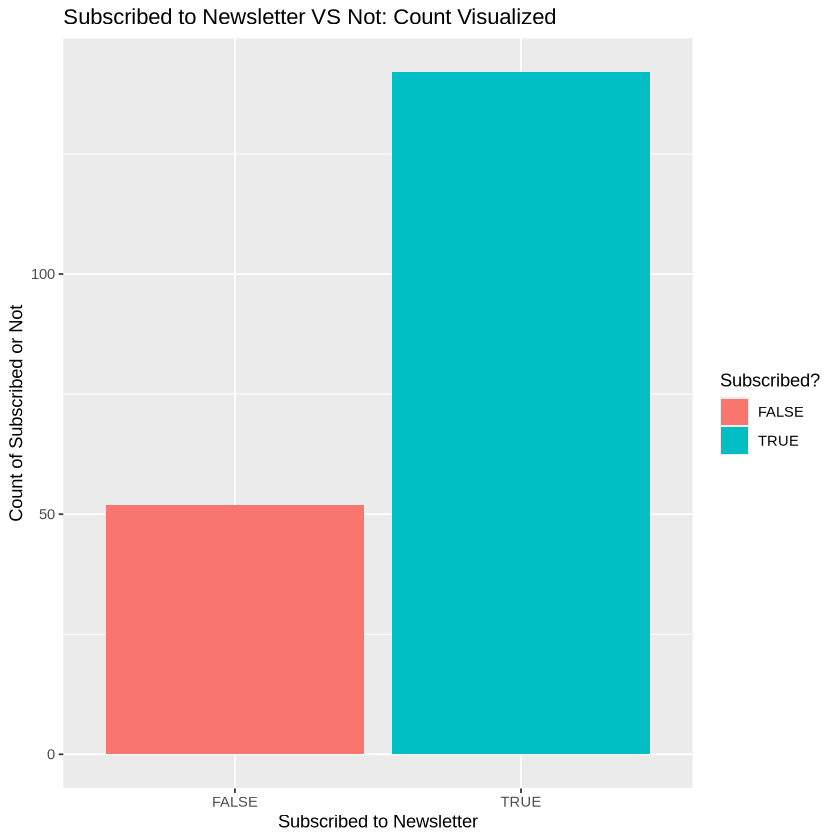

In [26]:
subscribed_count_bargraph <- subscribe_count|>ggplot(aes(x=subscribe, y=n, fill=subscribe))+
geom_bar(stat="identity") + 
labs(x="Subscribed to Newsletter", y="Count of Subscribed or Not", fill="Subscribed?")+
ggtitle("Subscribed to Newsletter VS Not: Count Visualized")

subscribed_count_bargraph


Subscribed Count (TRUE) VS Not Subscribed Count (FALSE). 
- Clarifies need to ovsersample rare class (FALSE)  in future clear that in future steps. 

In [ ]:
age_vs_played_hours <- players|>ggplot(aes(x=Age, y=played_hours, color=subscribe))+
geom_point() +
scale_y_log10() +
labs(x="User Age", y="Hours Played by User", color="Subscribed?")+
ggtitle("Relationship between Age and Played Hours: Colored by Subscription")

age_vs_played_hours

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


Age vs played_hours, color by subscribed. 
- Younger players have higher played hours (somewhat negative relationship, weak, nonlinear).
- Looking at age as predictor due to the fact that it is quantitative, and there is some data variety - still some uneven distribution limitations, but not as significant as in other variables. 
- More data points for younger players (>25). Higher played hours + lower age correlate to subscription.
- Played hours + age likely predictive of subscription.
- Limitation of played hours is the unequal distribution of data (85/197 are at 0 played hours) -> reason why it is not being factored as a predictor in question due to data issues. 


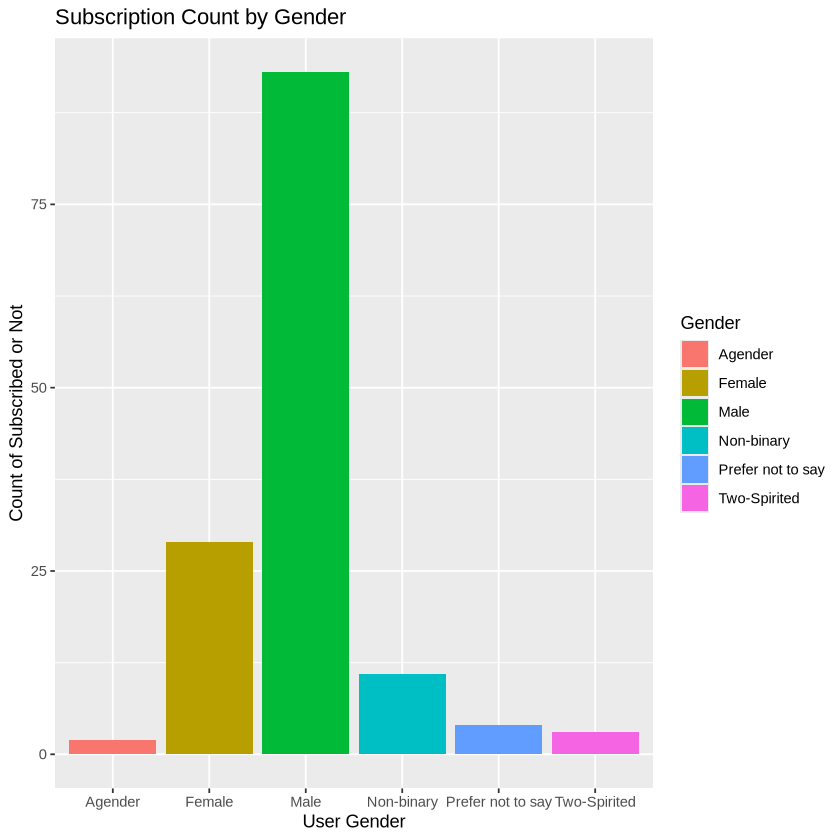

In [22]:
gender_subscribed_bar <- ratio_gender_subscribed|>ggplot(aes(x=gender, y=subscribed,, fill=gender))+
geom_bar(stat="identity") + 
labs(x="User Gender", y="Count of Subscribed or Not", fill="Gender")+
ggtitle("Subscription Count by Gender")

gender_subscribed_bar

Gender counts show males then females have highest subscriptions. 
- Likely because more data points. 

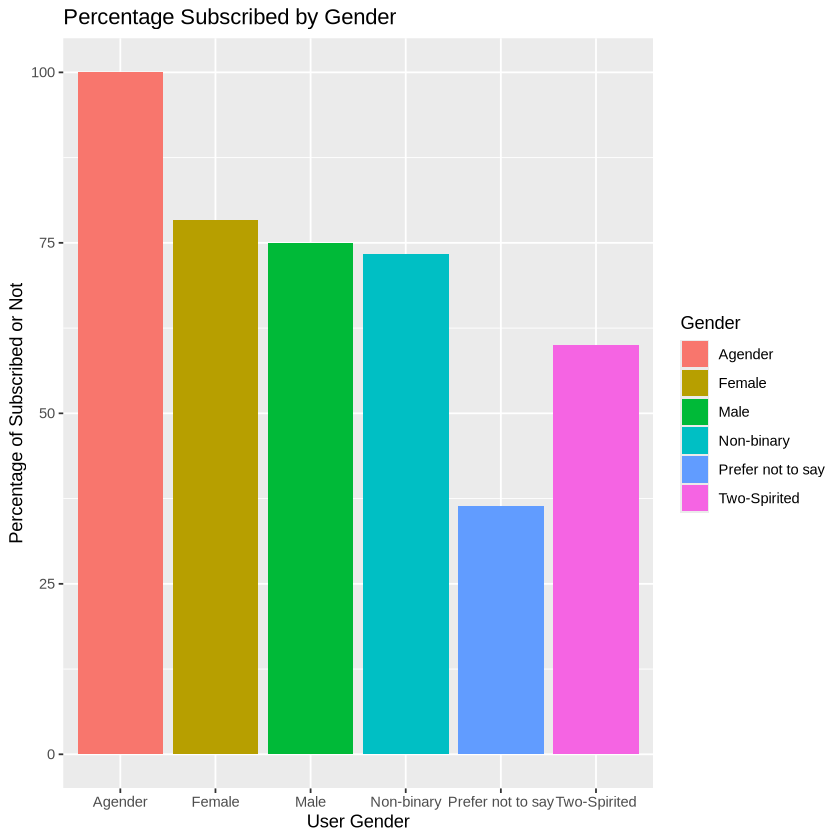

In [23]:
gender_subscribed_ratio_bar <- ratio_gender_subscribed|>ggplot(aes(x=gender, y=percentage_subscribed, fill=gender))+
geom_bar(stat="identity") +
labs(x="User Gender", y="Percentage of Subscribed or Not", fill="Gender")+
ggtitle("Percentage Subscribed by Gender")


gender_subscribed_ratio_bar


Percentage subscribed by gender - women have a highest subscription rate.
- Small-category sizes limit inference.
- Data limitations prevalent ( limited data for agender and other).
- Change in the dominating gender observed when looking at proportion instead of count.
- Likely a predictive variable.
  -  not being looked at as predictor due to being categorical, so not suitable for K-NN based on what is taught in this course

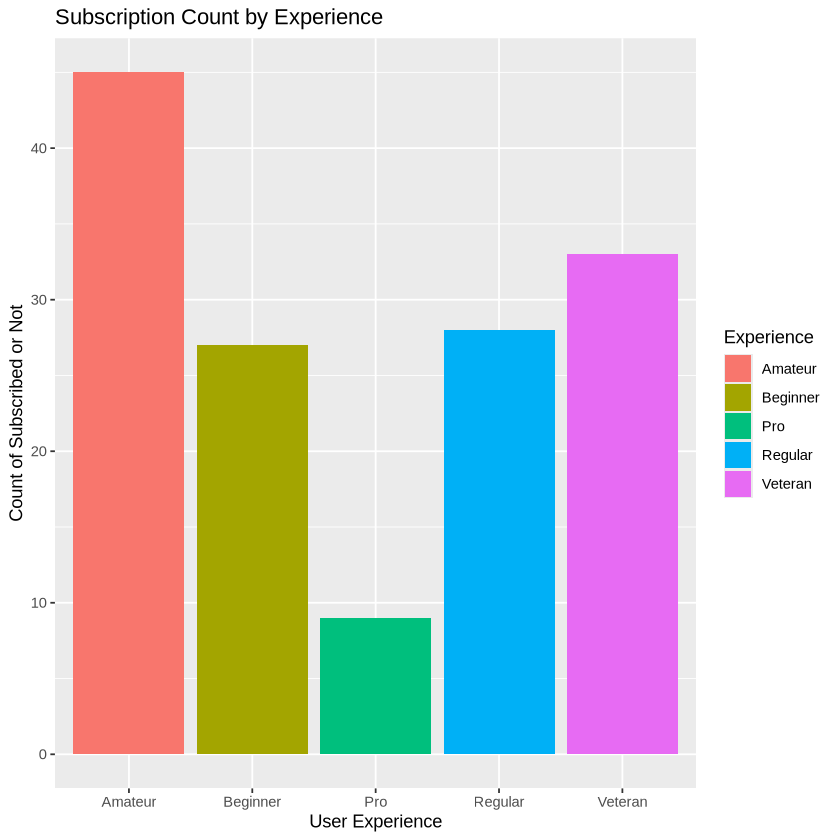

In [24]:
experience_subscribed_bar <- ratio_experience_subscribed|>ggplot(aes(x=experience, y=subscribed, fill=experience))+
geom_bar(stat="identity") +
labs(x="User Experience", y="Count of Subscribed or Not", fill="Experience")+
ggtitle("Subscription Count by Experience")

experience_subscribed_bar

Experience vs subscribed count. Highest subscribe count = Amateurs - also highest total count. 
- Relatively even distribution. 


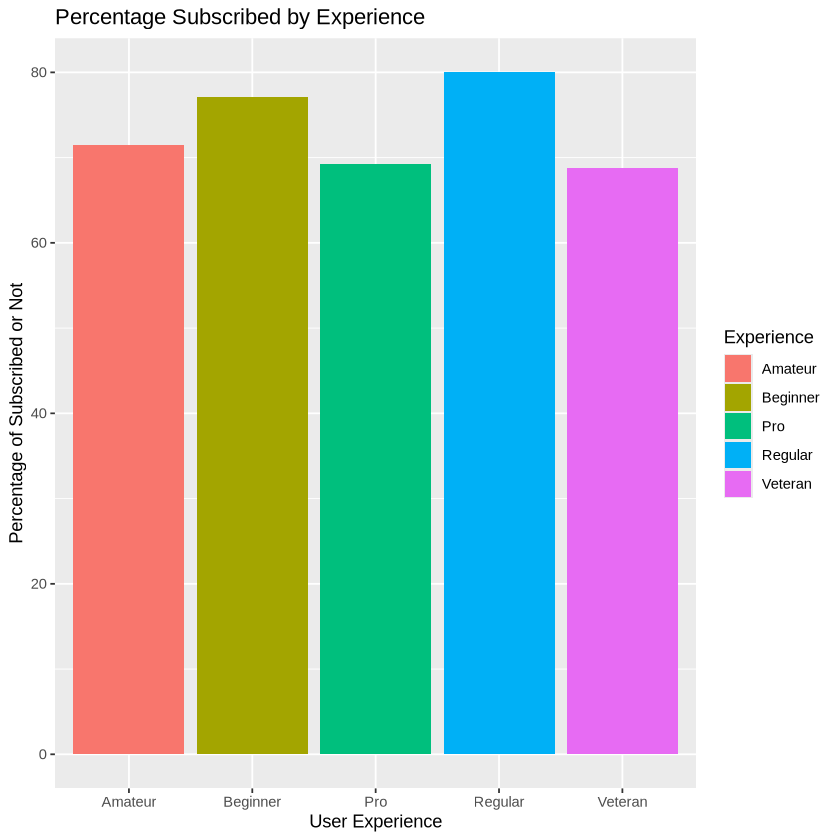

In [25]:
experience_subscribed_ratio_bar <- ratio_experience_subscribed|>ggplot(aes(x=experience, y=percentage_subscribed, fill=experience))+
geom_bar(stat="identity") +
labs(x="User Experience", y="Percentage of Subscribed or Not", fill="Experience")+
ggtitle("Percentage Subscribed by Experience")
experience_subscribed_ratio_bar

Regulars have highest subscribed percentage users across various experience categories - differences are small, so experience may be less predictive than gender or played hours.
- not being looked at as predictor because not very predictive and categorical 

# **Model**

K-Nearest Neighbors (K-NN) classification will be applied. This is a classification question as the response variable is subscribed vs not subscribed (TRUE or FALSE in the way it's written in the dataset) - it is binary, making classification appropriate. It is also now a factor (after wrangling). 

K-NN is suitable because it makes minimal assumptions about the data and can capture non-linear relationships between player characteristics, predictors (in this project Age) and the likelihood of subscribing. K-NN assumes similar behaviour (predictors) can predict similar outcomes (response variable). This is beneficial in this project. 

I will need to oversample the rare class (FALSE - nearly 3x as many people are subscribed as not). The data will also be split into 70% training, 30% testing sets. 

All numerical predictors need to be standardized within the recipe stage (Age), ensuring none have a dominating effect on the distance calculation within K-NN. Next, model tuning, as we will need to determine the optimal number of K's using cross-validation (5-fold), on the training data. The K with the highest cross-validated accuracy is the one that will be chosen for the final model (refit on training, and applied on testing for prediction). Age is predictor because of its negative relationship with subscription, and because it is numerical, so it is suitable for K-NN. 

Limitation: K-NN slow in large datasets. Other limitations of K-NN accounted for (data resampled and minimal predictors to avoid the other issues). 
